In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# the service URL
livechart = "https://nds.iaea.org/relnsd/v0/data?"
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))
df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df["a"]=df["z"] + df["n"]
df["b_over_a"] = df["binding"]

import plotly.express as px

df["Proton Number [Z]"] = df["z"]
df["Neutron Number [N]"] = df["n"]
df["Deficit [MeV]"] = -df["binding"]/1000.0
df["Odd Proton"] = df["z"] % 2 == 1

In [2]:
print(df.columns)

Index(['z', 'n', 'symbol', 'radius', 'unc_r', 'abundance', 'unc_a',
       'energy_shift', 'energy', 'unc_e', 'ripl_shift', 'jp', 'half_life',
       'operator_hl', 'unc_hl', 'unit_hl', 'half_life_sec', 'unc_hls',
       'decay_1', 'decay_1_%', 'unc_1', 'decay_2', 'decay_2_%', 'unc_2',
       'decay_3', 'decay_3_%', 'unc_3', 'isospin', 'magnetic_dipole', 'unc_md',
       'electric_quadrupole', 'unc_eq', 'qbm', 'unc_qb', 'qbm_n', 'unc_qbmn',
       'qa', 'unc_qa', 'qec', 'unc_qec', 'sn', 'unc_sn', 'sp', 'unc_sp',
       'binding', 'unc_ba', 'atomic_mass', 'unc_am', 'massexcess', 'unc_me',
       'me_systematics', 'discovery', 'ENSDFpublicationcut-off',
       'ENSDFauthors', 'Extraction_date', 'a', 'b_over_a', 'Proton Number [Z]',
       'Neutron Number [N]', 'Deficit [MeV]', 'Odd Proton'],
      dtype='object')


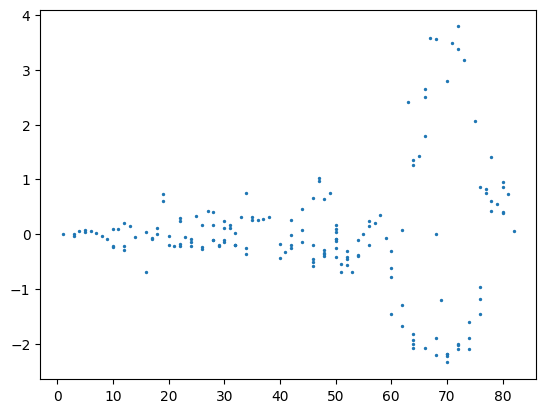

0        613.9
1          2.6
2          NaN
3       STABLE
4       STABLE
         ...  
3381        95
3382       NaN
3383        21
3384        51
3385      0.58
Name: half_life, Length: 3386, dtype: object


In [17]:
ndf =df[df.half_life == "STABLE"]
plt.scatter(ndf["z"], ndf.electric_quadrupole, s=2)
plt.show()

print(df.half_life)